# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
!pip install citipy

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)


614
['saint-philippe', 'punta arenas', 'yellowknife', 'derzhavinsk', 'alekseyevsk', 'mys shmidta', 'caravelas', 'chuy', 'butaritari', 'cabo san lucas', 'najran', 'ushuaia', 'beloha', 'krasnoselkup', 'bredasdorp', 'mpanda', 'victoria', 'albany', 'turukhansk', 'bluff', 'kijang', 'juneau', 'port alfred', 'norman wells', 'vaini', 'palabuhanratu', 'rocha', 'venado tuerto', 'rikitea', 'cap malheureux', 'khatanga', 'hithadhoo', 'saint-pierre', 'vila franca do campo', 'vigrestad', 'kutum', 'grindavik', 'flin flon', 'lewistown', 'oskemen', 'louisbourg', 'cape town', 'kara-tyube', 'marsabit', 'ejura', 'guerrero negro', 'taolanaro', 'hirado', 'villa carlos paz', 'busselton', 'port elizabeth', 'longyearbyen', 'kodiak', 'staryy nadym', 'upernavik', 'bethel', 'ponta do sol', 'papetoai', 'leningradskiy', 'padang', 'lebu', 'tasiilaq', 'tuktoyaktuk', 'portland', 'tabou', 'carnarvon', 'egvekinot', 'qaanaaq', 'belyy yar', 'rock sound', 'illoqqortoormiut', 'awjilah', 'kaeo', 'atasu', 'hermanus', 'avarua',

In [29]:
# Import cities into the cities_pd DataFrame
cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0:"City"})
cities_pd['Cloudiness'] = ""
cities_pd['Country'] = ""
cities_pd['Date'] = ""
cities_pd['Humidity'] = ""
cities_pd['Lat'] = ""
cities_pd['Lng'] = ""
cities_pd['Max Temp'] = ""
cities_pd['Wind Speed'] = ""

# Remove empty rows
cities_pd = cities_pd.dropna(how='any')
cities_pd.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,,,,,,,,
1,punta arenas,,,,,,,,
2,yellowknife,,,,,,,,
3,derzhavinsk,,,,,,,,
4,alekseyevsk,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Build query URL and request your results in Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
# Get weather data
units = "imperial"

In [38]:
# use iterrows to iterate through pandas dataframe
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in cities_pd.iterrows():

    # get City name from df
    city_name = row['City']

    # assemble url and make API request
    query_url = url + "appid=" + api_key + "&q=" + city_name + "&units=" + units

    response = requests.get(query_url).json()
    
    # extract results
    
    try:
        print(f"Processing Record {index+1} of {len(cities)} | {city_name}")
        cities_pd.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_pd.loc[index, 'Lng'] = response['coord']['lon']
        cities_pd.loc[index, 'Lat'] = response['coord']['lat']
        cities_pd.loc[index, 'Date'] = response['dt']
        cities_pd.loc[index, 'Country'] = response['sys']['country']
        cities_pd.loc[index, 'Humidity'] = response['main']['humidity']
        cities_pd.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_pd.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of 614 | saint-philippe
Processing Record 2 of 614 | punta arenas
Processing Record 3 of 614 | yellowknife
Processing Record 4 of 614 | derzhavinsk
Processing Record 5 of 614 | alekseyevsk
Processing Record 6 of 614 | mys shmidta
City not found. Skipping...
Processing Record 7 of 614 | caravelas
Processing Record 8 of 614 | chuy
Processing Record 9 of 614 | butaritari
Processing Record 10 of 614 | cabo san lucas
Processing Record 11 of 614 | najran
Processing Record 12 of 614 | ushuaia
Processing Record 13 of 614 | beloha
Processing Record 14 of 614 | krasnoselkup
City not found. Skipping...
Processing Record 15 of 614 | bredasdorp
Processing Record 16 of 614 | mpanda
Processing Record 17 of 614 | victoria
Processing Record 18 of 614 | albany
Processing Record 19 of 614 | turukhansk
Processing Record 20 of 614 | bluff
Processing Record 21 of 614 | kijang
Processing Record 22 of 614 

Processing Record 192 of 614 | oksovskiy
Processing Record 193 of 614 | pitimbu
Processing Record 194 of 614 | tongliao
Processing Record 195 of 614 | bolungarvik
City not found. Skipping...
Processing Record 196 of 614 | hobyo
Processing Record 197 of 614 | peruibe
Processing Record 198 of 614 | goba
Processing Record 199 of 614 | kaitangata
Processing Record 200 of 614 | grand-santi
Processing Record 201 of 614 | sidney
Processing Record 202 of 614 | bambous virieux
Processing Record 203 of 614 | mecca
Processing Record 204 of 614 | abbeville
Processing Record 205 of 614 | puerto ayora
Processing Record 206 of 614 | panna
Processing Record 207 of 614 | estelle
Processing Record 208 of 614 | nogliki
Processing Record 209 of 614 | acari
Processing Record 210 of 614 | nichinan
Processing Record 211 of 614 | whitehorse
Processing Record 212 of 614 | le port
Processing Record 213 of 614 | dinsor
City not found. Skipping...
Processing Record 214 of 614 | pangkalanbuun
Processing Record 215

Processing Record 379 of 614 | coquimbo
Processing Record 380 of 614 | izumo
Processing Record 381 of 614 | rassvet
Processing Record 382 of 614 | puksoozero
Processing Record 383 of 614 | san cristobal
Processing Record 384 of 614 | berlevag
Processing Record 385 of 614 | tomohon
Processing Record 386 of 614 | sussex
Processing Record 387 of 614 | fort nelson
Processing Record 388 of 614 | presidente medici
Processing Record 389 of 614 | corowa
Processing Record 390 of 614 | gat
Processing Record 391 of 614 | belize
City not found. Skipping...
Processing Record 392 of 614 | ambunti
Processing Record 393 of 614 | gulshat
City not found. Skipping...
Processing Record 394 of 614 | nizwa
Processing Record 395 of 614 | isangel
Processing Record 396 of 614 | sisimiut
Processing Record 397 of 614 | viedma
Processing Record 398 of 614 | kochki
Processing Record 399 of 614 | tumannyy
City not found. Skipping...
Processing Record 400 of 614 | san patricio
Processing Record 401 of 614 | verkhnev

Processing Record 572 of 614 | margate
Processing Record 573 of 614 | belmonte
Processing Record 574 of 614 | pemangkat
City not found. Skipping...
Processing Record 575 of 614 | abha
Processing Record 576 of 614 | los llanos de aridane
Processing Record 577 of 614 | ewa beach
Processing Record 578 of 614 | ponta delgada
Processing Record 579 of 614 | fuyu
Processing Record 580 of 614 | bourail
Processing Record 581 of 614 | lebork
Processing Record 582 of 614 | troitskoye
Processing Record 583 of 614 | mahon
Processing Record 584 of 614 | omboue
Processing Record 585 of 614 | axim
Processing Record 586 of 614 | riberalta
Processing Record 587 of 614 | bocas del toro
Processing Record 588 of 614 | bumba
Processing Record 589 of 614 | rio grande
Processing Record 590 of 614 | kununurra
Processing Record 591 of 614 | bolshoy kamen
Processing Record 592 of 614 | isla vista
Processing Record 593 of 614 | brae
Processing Record 594 of 614 | port macquarie
Processing Record 595 of 614 | senn

In [39]:
# Recognize empty rows and apply NaN
cities_pd['Country'].replace('', np.nan, inplace=True)

# Clean dataframe of missing data
clean_cities_pd = cities_pd.dropna(how='any')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
# Export the city data into a .csv
clean_cities_pd.to_csv(output_data_file, index=False)

# Display the dataframe
clean_cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,1,CA,1553562307,35,45.36,-73.48,30,11.32
1,punta arenas,40,CL,1553561549,65,-53.16,-70.91,46.4,14.99
2,yellowknife,90,CA,1553562192,94,62.45,-114.38,33.01,16.11
3,derzhavinsk,88,KZ,1553562389,91,51.1,66.31,39.99,16.46
4,alekseyevsk,0,RU,1553562389,67,57.84,108.35,-1.87,2.37


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

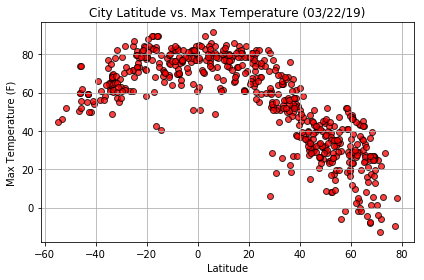

In [41]:
# Create scatter plot
plt.scatter(clean_cities_pd['Lat'], clean_cities_pd['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Max Temperature (03/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()

# Prints the scatter plot to the screen
plt.savefig("output_data/lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

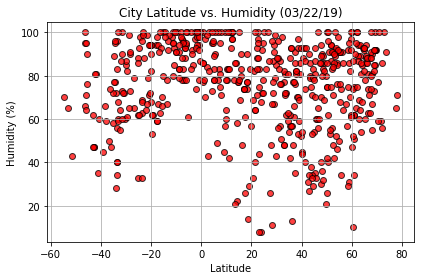

In [42]:
# Create scatter plot
plt.scatter(clean_cities_pd['Lat'], clean_cities_pd['Humidity'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Humidity (03/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Prints the scatter plot to the screen
plt.savefig("output_data/lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

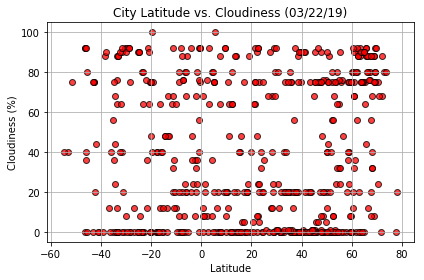

In [43]:
# Create scatter plot
plt.scatter(clean_cities_pd['Lat'], clean_cities_pd['Cloudiness'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Cloudiness (03/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Prints the scatter plot to the screen
plt.savefig("output_data/lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

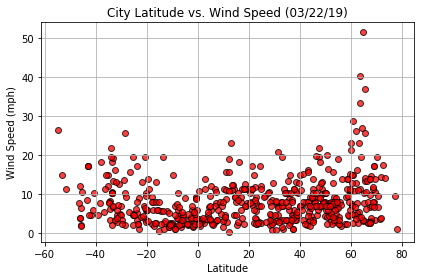

In [44]:
# Create scatter plot
plt.scatter(clean_cities_pd['Lat'], clean_cities_pd['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Wind Speed (03/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()

# Prints the scatter plot to the screen
plt.savefig("output_data/lat_vs_wind.png")
plt.show()